# **RENTAS**

*Ya hemos hecho una primera aproximación a las rentas al ver cómo funciona la librería de Numpy Financial, pero en este apartado vamos a profundizar más en la teoría de las Rentas, ver su clasificación y documentarlo mediante ejemplos prácticos*

**Clasificación de las Rentas**

>**Primera Clasificación**

*Rentas discretas: en las que las cuantías vencen en un momento concreto*

*Rentas continuas: trabajan con una distribución de cuantía. Normalmente son rentas teóricas que encontramos en libros de Finanzas*

>**Segunda Clasificación**

*Rentas de cuantía constante: su cuantía no varia, siempre es la misma*
    
    -Rentas Unitarias: aquellas cuya cuantía es de 1 €
    
*Rentas de cuantía variable: la renta no es constante*

    -Rentas de progresión aritmética: la cuantía varía siguiendo una progresión aritmética.
    -Rentas de progresión geométrica: la cuantía varía siguiendo una progresión geométrica.
    
>**Tercera Clasificación**

*Rentas inmediatas: el instante de valoración está situado en el principio y final de la renta.*
*Rentas diferidas: el punto de valoración es anterior al origen de la renta.*
*Rentas anticipadas: el punto de valoración es posterior al origen de la renta.*

>**Cuarta Clasificación**

*Rentas temporales: su número de términos es finito.*
*Rentas perpetuas: su número de términos tiende a infinito.*

>**Quinta Clasificación**

*Rentas prepagables: la cuantía vence al inicio del periodo.*
*Rentas pospagables: la cuantía vence al final del periodo.*




**Importamos liberías que nos permitirán ver algunos ejemplos**

In [1]:
pip install numpy-financial

Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy_financial as npf

**Vamos a comprobar distintos métodos de realizar cálculos con Rentas mediante algunos ejemplos**


*1. Calcular el valor final de una renta de 120 términos mensuales, prepagables, constantes de 1.000 €, valorada al 7% efectivo anual.*

In [3]:
n = 120
pmt = 1000
i = 0.07
m = 12
im = (1+i)**(1/m)-1

#Método 1. Mediante fórmula de fv

fv = npf.fv(rate=im, nper=n, pmt=-pmt, pv=0, when='begin')
print("Resultado método 1: {} euros.".format(round(fv,2)))

#Método 2. Mediante fórmula Cf = pmt*(1+im)*(1+im)^(n)-1/im

Cf = pmt*(1+im)*((1+im)**n-1)/im
print("Resultado método 2: {} euros".format(round(Cf,2)))


Resultado método 1: 172018.88 euros.
Resultado método 2: 172018.88 euros


Vamos a realizar el paso a paso de lo que nuestra función está calculando

In [4]:
n = 4
pmt = 100
tasa = 0.10
#m = 12
#im = (1+tasa)**(1/m)-1


#vamos a crear una lista
periodos = range(n)
renta = [0]

for i in periodos:
    a = pmt*(1+tasa)**i
    print(round(a,2))
    renta.append(a) 

renta_total = sum(renta)
print(round(renta_total,2))

100.0
110.0
121.0
133.1
464.1


In [5]:
valor_actual = npf.pv(0.10,4,-100,0,0)
print("Valor actual de la renta", round(valor_actual,2))

valor_final = npf.fv(0.10,4,-100,0,0)
print("Valor final de la renta", round(valor_final,2))

Valor actual de la renta 316.99
Valor final de la renta 464.1


In [6]:
import matplotlib.pyplot as plt
import numpy as np

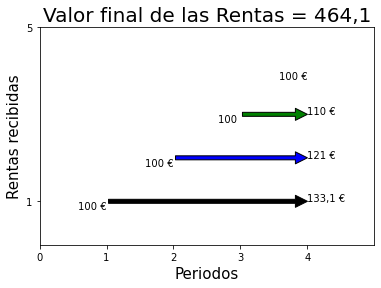

In [7]:

fig, ax = plt.subplots()
ax.annotate('100 €', xy=(4, 1), xycoords='data',
            xytext=(1, 1), textcoords='data',
            arrowprops=dict(facecolor='black', shrink= 1),
            horizontalalignment='right', verticalalignment='top')
ax.annotate("133,1 €", [4, 1])
ax.annotate('100 €', xy=(4, 2), xycoords='data',
            xytext=(2, 2), textcoords='data',
            arrowprops=dict(facecolor='blue', shrink= 1),
            horizontalalignment='right', verticalalignment='top')
ax.annotate("121 €", [4, 2])
ax.annotate('100 ', xy=(4, 3), xycoords='data',
            xytext=(3, 3), textcoords='data',
            arrowprops=dict(facecolor='green', shrink= 1),
            horizontalalignment='right', verticalalignment='top')
ax.annotate("110 €", [4, 3])
ax.annotate('100 €', xy=(4, 4), xycoords='data',
            xytext=(4, 4), textcoords='data',
            arrowprops=dict(facecolor='darkblue', shrink= 1),
            horizontalalignment='right', verticalalignment='top')

plt.title("Valor final de las Rentas = 464,1", fontsize = 20)
plt.xlabel("Periodos", fontsize = 15)
plt.ylabel("Rentas recibidas", fontsize = 15)
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5, 1))
plt.yticks((1, 5))
plt.show()

En este gráfico podemos ver capitalizada cada una de las rentas recibidas.

In [8]:
n = 4
pmt = 100
tasa = 0.10
#m = 12
#im = (1+tasa)**(1/m)-1


#vamos a crear una lista
periodos = range(n+1)
renta = [0]

for i in periodos:
    a = pmt*(1+tasa)**-i
    print(round(a,2))
    renta.append(a) 

renta_total = sum(renta)-pmt
print(round(renta_total,2))

100.0
90.91
82.64
75.13
68.3
316.99


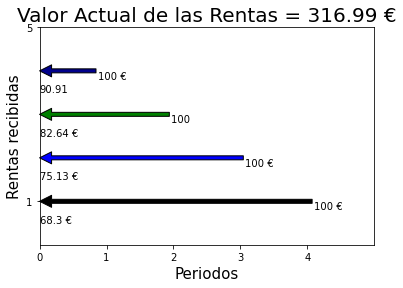

In [9]:

fig, ax = plt.subplots()
ax.annotate('100 €', xy=(0, 1), xycoords='data',
            xytext=(4.1, 1), textcoords='data',
            arrowprops=dict(facecolor='black', shrink= 1),
            horizontalalignment='left', verticalalignment='top')
ax.annotate("68.3 €", [0, 0.5])
ax.annotate('100 €', xy=(0, 2), xycoords='data',
            xytext=(3.5, 2), textcoords='data',
            arrowprops=dict(facecolor='blue', shrink= 1),
            horizontalalignment='right', verticalalignment='top')
ax.annotate("75.13 €", [0, 1.5])
ax.annotate('100 ', xy=(0, 3), xycoords='data',
            xytext=(2.3, 3), textcoords='data',
            arrowprops=dict(facecolor='green', shrink= 1),
            horizontalalignment='right', verticalalignment='top')
ax.annotate("82.64 €", [0, 2.5])
ax.annotate('100 €', xy=(0, 4), xycoords='data',
            xytext=(1.3, 4), textcoords='data',
            arrowprops=dict(facecolor='darkblue', shrink= 1),
            horizontalalignment='right', verticalalignment='top')
ax.annotate("90.91", [0, 3.5])

plt.title("Valor Actual de las Rentas = 316.99 €", fontsize = 20)
plt.xlabel("Periodos", fontsize = 15)
plt.ylabel("Rentas recibidas", fontsize = 15)
plt.xlim(0, 5)
plt.xticks(np.arange(0, 5, 1))
plt.yticks((1, 5))
plt.show()

En este otro gráfico sin embargo vemos descontadas las rentas recibidas.

*2. De una renta prepagable, de 500 € mensuales y duración un año, sabemos que su valor actual es de 5.700 €. Calcular el tanto efectivo anual al que se calculó el valor actual*


In [11]:
n = 1
pmt = 500
pv = 5700
m = 12


#Método 1. Mediante fórmula de fv

rate = npf.rate(nper=m, pmt=pmt, pv=-pv, fv=0, when='begin')
i = (1+rate)**m-1
print("Resultado método 1: {} %.".format(round((i*100),2)))



Resultado método 1: 11.97 %.


*3. Un agricultor desea adquirir un tractor dentro de 4 años por importe de 60.000 €. Para ello decide ahorrar efectuando aportaciones trimestrales de 3.000 €, comenzando hoy mismo la primera. El depósito se remunera al 6% nominal anual. Es consciente de que a pesar de las 16 aportaciones realizadas al fondo, no llegará al montante necesario y tendrá que pagar, dentro de 4 años, un importe X para poder adquirir el tractor. Calcular X.*

In [12]:
n = 4
m = n*4
fv = 60000
pmt = 3000
i = 0.06
itr = i/4
# X = ?

fv1 = npf.fv(rate=itr, nper=m, pmt=-pmt, pv=0, when='begin')
print("Al final del periodo, el agricultor ha ahorrado {} euros".format(round(fv1,2)))

x = fv - fv1 
print("El agricultor tendrá que abonar {} euros dentro de 4 años".format(round(x,2)))

Al final del periodo, el agricultor ha ahorrado 54604.07 euros
El agricultor tendrá que abonar 5395.93 euros dentro de 4 años
